In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
import matplotlib.cm as cm
import math
filename1 = "./Inputs/C01_HF_chr19_merged_sorted_rd.bismark.cov"
filename2 = "./Inputs/C02_HF_chr19_merged_sorted_rd.bismark.cov"
filename3 = "./Inputs/C01_PBL_chr19_merged_sorted_rd.bismark.cov"
filename4 = "./Inputs/C02_PBL_chr19_merged_sorted_rd.bismark.cov"
from_paper = "./Inputs/C01_HF_chr19_lane1_bins.csv"
df_cov_C01_HF_RD = pd.read_table(filename1,header=None)
df_cov_C01_HF_RD.columns = ['Chromosome','Position','End','Perc','Methylated','Unmethylated']
df_cov_C02_HF_RD = pd.read_table(filename2,header=None)
df_cov_C02_HF_RD.columns = ['Chromosome','Position','End','Perc','Methylated','Unmethylated']
df_cov_C01_PBL_RD = pd.read_table(filename3,header=None)
df_cov_C01_PBL_RD.columns = ['Chromosome','Position','End','Perc','Methylated','Unmethylated']
df_cov_C02_PBL_RD = pd.read_table(filename4,header=None)
df_cov_C02_PBL_RD.columns = ['Chromosome','Position','End','Perc','Methylated','Unmethylated']
from_paper_df = pd.read_csv(from_paper)


In [123]:
df_cov_C01_HF_RD.count()

Chromosome      1281490
Position        1281490
End             1281490
Perc            1281490
Methylated      1281490
Unmethylated    1281490
dtype: int64

In [124]:
df_cov_C01_HF_RD.count()

Chromosome      1281490
Position        1281490
End             1281490
Perc            1281490
Methylated      1281490
Unmethylated    1281490
dtype: int64

In [125]:
df_cov_C01_HF_RD.head(10)


,Chromosome,Position,End,Perc,Methylated,Unmethylated
0,chr19,61198,61198,100.000000,10,0
1,chr19,61291,61291,100.000000,23,0
2,chr19,61380,61380,90.000000,9,1
3,chr19,62959,62959,84.210526,16,3
4,chr19,63033,63033,92.452830,49,4
5,chr19,63111,63111,83.333333,20,4
6,chr19,63147,63147,51.851852,14,13
7,chr19,63217,63217,78.260870,18,5
8,chr19,63225,63225,75.000000,18,6
9,chr19,63295,63295,96.969697,32,1


In [126]:
# Correct one
print(sum(df_cov_C01_HF_RD['Perc'].iloc[0:5])/5)
# Prev one
print(sum(df_cov_C01_HF_RD['Methylated'].iloc[0:5])/(sum(df_cov_C01_HF_RD['Methylated'].iloc[0:5])+sum(df_cov_C01_HF_RD['Unmethylated'].iloc[0:5])))

93.33267130089374
0.9304347826086956


In [127]:
from operator import add
import numpy as np
import os
import sys
from collections import defaultdict
#bin_size = 200

df_cov_C01_HF_RD = df_cov_C01_HF_RD.iloc[:,-6:]
df_cov_C01_HF_RD = df_cov_C01_HF_RD.sort_values(['Chromosome', 'Position'], ascending=[True, True])
df_cov_C01_HF_RD = df_cov_C01_HF_RD.reset_index(drop=True)

df_cov_C02_HF_RD = df_cov_C02_HF_RD.iloc[:,-6:]
df_cov_C02_HF_RD = df_cov_C02_HF_RD.sort_values(['Chromosome', 'Position'], ascending=[True, True])
df_cov_C02_HF_RD = df_cov_C02_HF_RD.reset_index(drop=True)

df_cov_C01_PBL_RD = df_cov_C01_PBL_RD.iloc[:,-6:]
df_cov_C01_PBL_RD = df_cov_C01_PBL_RD.sort_values(['Chromosome', 'Position'], ascending=[True, True])
df_cov_C01_PBL_RD = df_cov_C01_PBL_RD.reset_index(drop=True)

df_cov_C02_PBL_RD = df_cov_C02_PBL_RD.iloc[:,-6:]
df_cov_C02_PBL_RD = df_cov_C02_PBL_RD.sort_values(['Chromosome', 'Position'], ascending=[True, True])
df_cov_C02_PBL_RD = df_cov_C02_PBL_RD.reset_index(drop=True)


In [128]:
df_cov_C01_HF_RD.head()

,Chromosome,Position,End,Perc,Methylated,Unmethylated
0,chr19,61198,61198,100.000000,10,0
1,chr19,61291,61291,100.000000,23,0
2,chr19,61380,61380,90.000000,9,1
3,chr19,62959,62959,84.210526,16,3
4,chr19,63033,63033,92.452830,49,4


In [129]:
bin_coverage_C01_HF = defaultdict(lambda:0)
bin_coverage_C02_HF = defaultdict(lambda:0)
bin_coverage_C01_PBL = defaultdict(lambda:0)
bin_coverage_C02_PBL = defaultdict(lambda:0)
# {key1:0, key2:0 ...}

In [130]:
nCpG_with_given_rd_C01_HF = defaultdict(lambda:0)
nCpG_with_given_rd_C02_HF = defaultdict(lambda:0)
nCpG_with_given_rd_C01_PBL = defaultdict(lambda:0)
nCpG_with_given_rd_C02_PBL = defaultdict(lambda:0)

In [131]:
bin_data_C01_HF = defaultdict(lambda:0)
bin_data_C02_HF = defaultdict(lambda:0)
bin_data_C01_PBL = defaultdict(lambda:0)
bin_data_C02_PBL = defaultdict(lambda:0)

In [132]:
bin_data_C01_HF.items()


dict_items([])

In [133]:
bin_coverage_C01_HF.items()


dict_items([])

In [134]:
# DataFrame.iterrows is a generator which yields both the index and row

def create_bins(cov_df, bin_data, bin_coverage, nCpG_with_given_rd, bin_size, read_depth, CpG_cov):

    for index, line in cov_df.iterrows():
        # Split line into components
        chrm_name = str(line["Chromosome"])
        start = int(line["Position"])
        end = int(line["End"])

        num_methylated_reads = line["Methylated"]
        num_unmethylated_reads = line["Unmethylated"]
        methylation = line["Perc"]

        bin_number = (start-1)//bin_size # Using integer division is the key here
        bin_label = (bin_number*bin_size) + bin_size

        bin_data[bin_label] = bin_data[bin_label] + methylation
        bin_coverage[bin_label] += 1
        if((num_methylated_reads+num_unmethylated_reads)>=read_depth):
            nCpG_with_given_rd[bin_label] +=1
            
    coordinates = []
    bin_names = []
    methylations = []
    cpgs_covered = []
    cpgs_withRD_n = []

    # Append bin data do lists so we can add them to the data frame
    sorted_keys = list(bin_data.keys())
    sorted_keys.sort()
    for _bin in sorted_keys:

        # Coordinates
        bin_name = chrm_name + "_" + str(_bin)
        bin_start_loc = _bin - bin_size
        bin_end_loc = _bin
        UCSC_browser_coordinates = chrm_name + ":" + str(bin_start_loc) + "-" +  str(bin_end_loc)

        # Methylation percentage
        bin_methylation_data = bin_data[_bin]
        avg_methylation = 0
        if bin_coverage[_bin] != 0: # Denominator is not 0
            avg_methylation  = bin_methylation_data/bin_coverage[_bin]

        # Append data to lists
        coordinates.append(UCSC_browser_coordinates)
        bin_names.append(bin_name)
        methylations.append(avg_methylation)
        cpgs_covered.append(bin_coverage[_bin])
        cpgs_withRD_n.append(nCpG_with_given_rd[_bin])
    
#     for i in range(10):
#         print("{} - {} - {} - {}".format(coordinates[i], bin_names[i], methylations[i], cpgs_covered[i], cpgs_withRD_n[i]))
    
    dataframe_data = {"UCSC Browser Coordinates":coordinates,"Bin Name":bin_names,"Avg Methylation":methylations,"CpGs Covered":cpgs_covered, "Num of CpGs with RD_n":cpgs_withRD_n}
    df = pd.DataFrame.from_dict(dataframe_data)
    
    
    #NEW
    temp_df1 = df[df['CpGs Covered'] < CpG_cov]
    df_filtered_2_1 = temp_df1[temp_df1['Num of CpGs with RD_n'] >= 2]  
    #even 1 CpG but sufficient read depth. the bin should be kept.
    filtered_df_2_2 = temp_df1[(temp_df1['CpGs Covered']== 1) & (temp_df1['Num of CpGs with RD_n'] == 1)]
    df_filtered_1 = df[(df['CpGs Covered']>=CpG_cov)]
    df_filtered_1['ceil_CpG_half'] = df_filtered_1['CpGs Covered'].apply(lambda x: math.ceil(x/2))
    df_filtered_3 = df_filtered_1[df_filtered_1['ceil_CpG_half'] <= df_filtered_1['Num of CpGs with RD_n']]
    df_filtered_3 = df_filtered_3.drop('ceil_CpG_half', 1)
    df = pd.concat([df_filtered_2_1, filtered_df_2_2, df_filtered_3], ignore_index=True)
    
    ###
    
    return df
        

df_filtered_C01_HF = create_bins(df_cov_C01_HF_RD, bin_data_C01_HF, bin_coverage_C01_HF, nCpG_with_given_rd_C01_HF, 200, 10,4)
df_filtered_C02_HF = create_bins(df_cov_C02_HF_RD, bin_data_C02_HF, bin_coverage_C02_HF, nCpG_with_given_rd_C02_HF, 200, 10,4)
df_filtered_C01_PBL = create_bins(df_cov_C01_PBL_RD, bin_data_C01_PBL, bin_coverage_C01_PBL, nCpG_with_given_rd_C01_PBL, 200, 10,4)
df_filtered_C02_PBL = create_bins(df_cov_C02_PBL_RD, bin_data_C02_PBL, bin_coverage_C02_PBL, nCpG_with_given_rd_C02_PBL, 200, 10,4)


/Users/udithamaduranga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/udithamaduranga/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [135]:
df_filtered_C01_HF.to_csv("./Outputs/C01_HF_chr19_filtered.csv",header= True)
df_filtered_C02_HF.to_csv("./Outputs/C02_HF_chr19_filtered.csv",header= True)
df_filtered_C01_PBL.to_csv("./Outputs/C01_PBL_chr19_filtered.csv",header= True)
df_filtered_C02_PBL.to_csv("./Outputs/C02_PBL_chr19_filtered.csv",header= True)
df_filtered_C01_HF.head()


,UCSC Browser Coordinates,Bin Name,Avg Methylation,CpGs Covered,Num of CpGs with RD_n
0,chr19:61200-61400,chr19_61400,95.000000,2,2
1,chr19:63000-63200,chr19_63200,75.879338,3,3
2,chr19:68400-68600,chr19_68600,97.435897,3,3
3,chr19:91000-91200,chr19_91200,66.448802,2,2
4,chr19:93000-93200,chr19_93200,87.525084,3,3


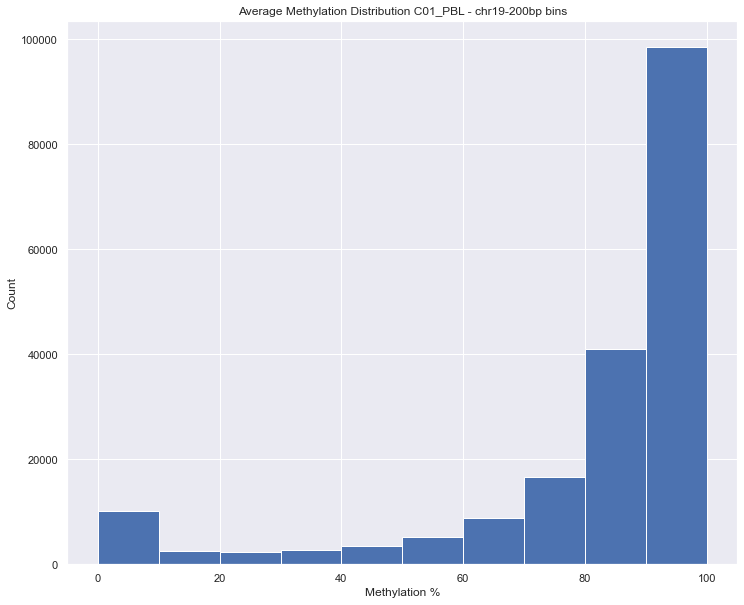

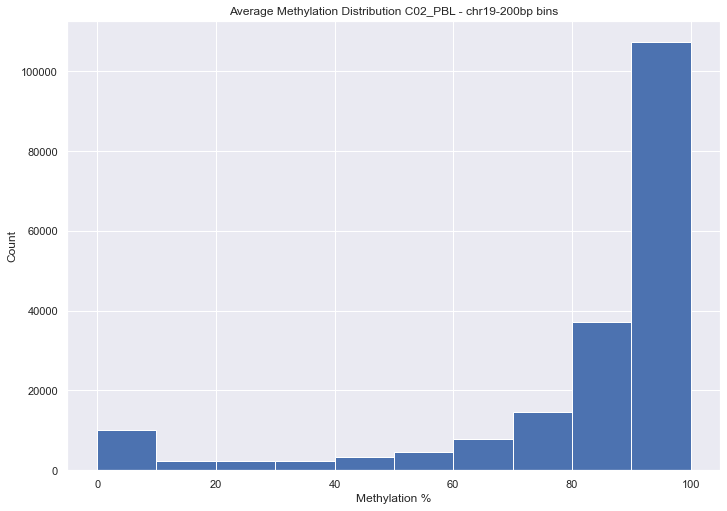

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.hist(df_filtered_C01_PBL["Avg Methylation"], edgecolor = "white")
plt.title('Average Methylation Distribution C01_PBL - chr19-200bp bins')
plt.xlabel('Methylation %')
plt.ylabel('Count')
plt.show() 

plt.hist(df_filtered_C02_PBL["Avg Methylation"], edgecolor = "white")
plt.title('Average Methylation Distribution C02_PBL - chr19-200bp bins')
plt.xlabel('Methylation %')
plt.ylabel('Count')
plt.show() 

In [137]:
result_PBL = pd.merge(df_filtered_C01_PBL, df_filtered_C02_PBL, on="Bin Name")
result_HF = pd.merge(df_filtered_C01_HF, df_filtered_C02_HF, on="Bin Name")

result_PBL.columns = ['UCSC Browser Coordinates C01','Bin Name','Avg Methylation C01','CpGs Covered C01', 'Num of CpGs with RD_n C01', 'UCSC Browser Coordinates C02','Avg Methylation C02','CpGs Covered C02','Num of CpGs with RD_n C02']
result_PBL = result_PBL[['Bin Name', 'UCSC Browser Coordinates C01','Avg Methylation C01','CpGs Covered C01', 'Num of CpGs with RD_n C01', 'UCSC Browser Coordinates C02','Avg Methylation C02','CpGs Covered C02', 'Num of CpGs with RD_n C02']]
result_HF.columns = ['UCSC Browser Coordinates C01','Bin Name','Avg Methylation C01','CpGs Covered C01', 'Num of CpGs with RD_n C01', 'UCSC Browser Coordinates C02','Avg Methylation C02','CpGs Covered C02', 'Num of CpGs with RD_n C02']
result_HF = result_HF[['Bin Name', 'UCSC Browser Coordinates C01','Avg Methylation C01','CpGs Covered C01', 'Num of CpGs with RD_n C01',  'UCSC Browser Coordinates C02','Avg Methylation C02','CpGs Covered C02', 'Num of CpGs with RD_n C01']]
                        
result_HF.head()

,Bin Name,UCSC Browser Coordinates C01,Avg Methylation C01,CpGs Covered C01,Num of CpGs with RD_n C01,UCSC Browser Coordinates C02,Avg Methylation C02,CpGs Covered C02,Num of CpGs with RD_n C01
0,chr19_61400,chr19:61200-61400,95.000000,2,2,chr19:61200-61400,83.333333,1,2
1,chr19_63200,chr19:63000-63200,75.879338,3,3,chr19:63000-63200,77.915480,3,3
2,chr19_68600,chr19:68400-68600,97.435897,3,3,chr19:68400-68600,100.000000,3,3
3,chr19_91200,chr19:91000-91200,66.448802,2,2,chr19:91000-91200,82.094595,2,2
4,chr19_93200,chr19:93000-93200,87.525084,3,3,chr19:93000-93200,93.204482,5,3


Bin Name                        180398
UCSC Browser Coordinates C01    180398
Avg Methylation C01             180398
CpGs Covered C01                180398
Num of CpGs with RD_n C01       180398
UCSC Browser Coordinates C02    180398
Avg Methylation C02             180398
CpGs Covered C02                180398
Num of CpGs with RD_n C02       180398
dtype: int64


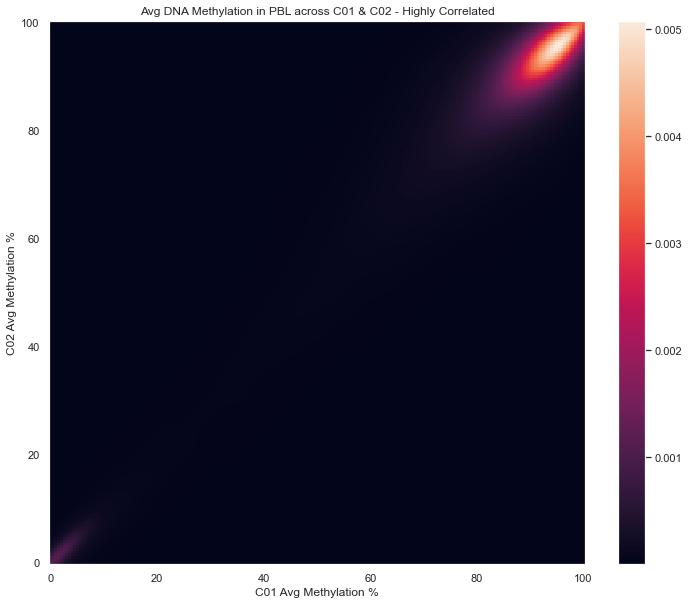

In [138]:
print(result_PBL.count())
x = result_PBL['Avg Methylation C01'].to_numpy()
y = result_PBL['Avg Methylation C02'].to_numpy()
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=200
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(12,10))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.colorbar()
plt.title('Avg DNA Methylation in PBL across C01 & C02 - Highly Correlated')
plt.xlabel('C01 Avg Methylation %')
plt.ylabel('C02 Avg Methylation %')
plt.show()



Bin Name                        192215
UCSC Browser Coordinates C01    192215
Avg Methylation C01             192215
CpGs Covered C01                192215
Num of CpGs with RD_n C01       192215
UCSC Browser Coordinates C02    192215
Avg Methylation C02             192215
CpGs Covered C02                192215
Num of CpGs with RD_n C01       192215
dtype: int64


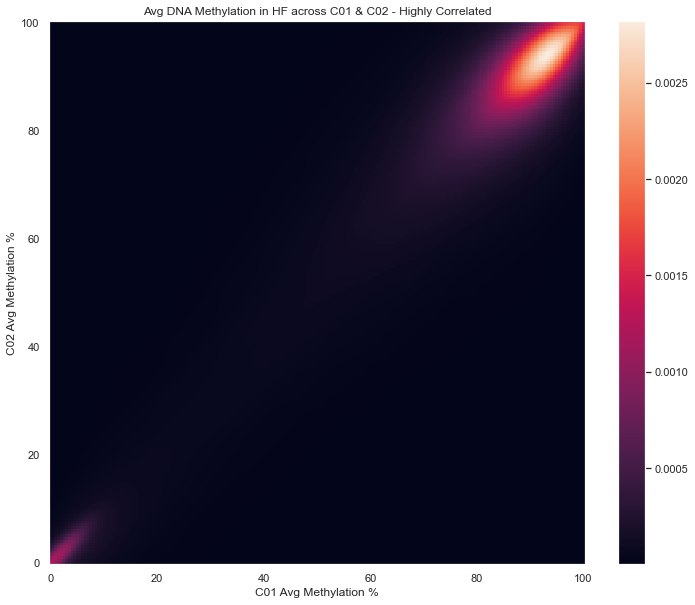

In [139]:
print(result_HF.count())
x = result_HF['Avg Methylation C01'].to_numpy()
y = result_HF['Avg Methylation C02'].to_numpy()
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=200
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(12,10))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.colorbar()
plt.title('Avg DNA Methylation in HF across C01 & C02 - Highly Correlated')
plt.xlabel('C01 Avg Methylation %')
plt.ylabel('C02 Avg Methylation %')
plt.show()

In [140]:
result_PBL['Residual PBL'] =  result_PBL['Avg Methylation C01'] - result_PBL['Avg Methylation C02']
result_HF['Residual HF'] = result_HF['Avg Methylation C01'] - result_HF['Avg Methylation C02']
result_PBL.head()

,Bin Name,UCSC Browser Coordinates C01,Avg Methylation C01,CpGs Covered C01,Num of CpGs with RD_n C01,UCSC Browser Coordinates C02,Avg Methylation C02,CpGs Covered C02,Num of CpGs with RD_n C02,Residual PBL
0,chr19_61400,chr19:61200-61400,90.909091,2,2,chr19:61200-61400,96.906566,3,3,-5.997475
1,chr19_63200,chr19:63000-63200,83.049959,3,3,chr19:63000-63200,82.379708,3,3,0.670250
2,chr19_68600,chr19:68400-68600,98.550725,3,3,chr19:68400-68600,100.000000,2,2,-1.449275
3,chr19_91200,chr19:91000-91200,69.747899,2,2,chr19:91000-91200,86.111111,2,2,-16.363212
4,chr19_95600,chr19:95400-95600,77.001634,3,3,chr19:95400-95600,87.191358,3,3,-10.189724


In [141]:
residual = pd.merge(result_PBL, result_HF, on="Bin Name")
residual.columns = ['Bin Name', 'UCSC Browser Coordinates C01 PBL','Avg Methylation C01 PBL','CpGs Covered C01 PBL', 'Num of CpGs with RD_n C01 PBL',  'UCSC Browser Coordinates C02 PBL','Avg Methylation C02 PBL','CpGs Covered C02 PBL', 'Num of CpGs with RD_n C02 PBL', 'Residual PBL', 'UCSC Browser Coordinates C01 HF','Avg Methylation C01 HF','CpGs Covered C01 HF', 'Num of CpGs with RD_n C01 HF',  'UCSC Browser Coordinates C02 HF','Avg Methylation C02 HF','CpGs Covered C02 HF', 'Num of CpGs with RD_n C02 HF', 'Residual HF']
residual.to_csv("./Outputs/residuals.csv",header= True)
residual.head()

,Bin Name,UCSC Browser Coordinates C01 PBL,Avg Methylation C01 PBL,CpGs Covered C01 PBL,Num of CpGs with RD_n C01 PBL,UCSC Browser Coordinates C02 PBL,Avg Methylation C02 PBL,CpGs Covered C02 PBL,Num of CpGs with RD_n C02 PBL,Residual PBL,UCSC Browser Coordinates C01 HF,Avg Methylation C01 HF,CpGs Covered C01 HF,Num of CpGs with RD_n C01 HF,UCSC Browser Coordinates C02 HF,Avg Methylation C02 HF,CpGs Covered C02 HF,Num of CpGs with RD_n C02 HF,Residual HF
0,chr19_61400,chr19:61200-61400,90.909091,2,2,chr19:61200-61400,96.906566,3,3,-5.997475,chr19:61200-61400,95.000000,2,2,chr19:61200-61400,83.333333,1,2,11.666667
1,chr19_63200,chr19:63000-63200,83.049959,3,3,chr19:63000-63200,82.379708,3,3,0.670250,chr19:63000-63200,75.879338,3,3,chr19:63000-63200,77.915480,3,3,-2.036141
2,chr19_68600,chr19:68400-68600,98.550725,3,3,chr19:68400-68600,100.000000,2,2,-1.449275,chr19:68400-68600,97.435897,3,3,chr19:68400-68600,100.000000,3,3,-2.564103
3,chr19_91200,chr19:91000-91200,69.747899,2,2,chr19:91000-91200,86.111111,2,2,-16.363212,chr19:91000-91200,66.448802,2,2,chr19:91000-91200,82.094595,2,2,-15.645793
4,chr19_95600,chr19:95400-95600,77.001634,3,3,chr19:95400-95600,87.191358,3,3,-10.189724,chr19:95400-95600,77.777778,3,3,chr19:95400-95600,75.770526,3,3,2.007252


Bin Name                            172607
UCSC Browser Coordinates C01 PBL    172607
Avg Methylation C01 PBL             172607
CpGs Covered C01 PBL                172607
Num of CpGs with RD_n C01 PBL       172607
UCSC Browser Coordinates C02 PBL    172607
Avg Methylation C02 PBL             172607
CpGs Covered C02 PBL                172607
Num of CpGs with RD_n C02 PBL       172607
Residual PBL                        172607
UCSC Browser Coordinates C01 HF     172607
Avg Methylation C01 HF              172607
CpGs Covered C01 HF                 172607
Num of CpGs with RD_n C01 HF        172607
UCSC Browser Coordinates C02 HF     172607
Avg Methylation C02 HF              172607
CpGs Covered C02 HF                 172607
Num of CpGs with RD_n C02 HF        172607
Residual HF                         172607
dtype: int64


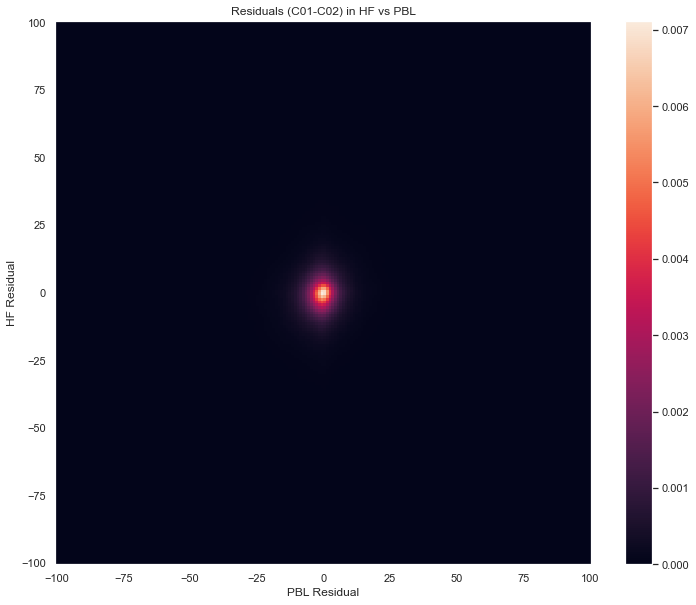

In [142]:
x = residual['Residual PBL'].to_numpy()
y = residual['Residual HF'].to_numpy()
print(residual.count())
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=200
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.figure(figsize=(12,10))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.colorbar()
plt.title('Residuals (C01-C02) in HF vs PBL')
plt.xlabel('PBL Residual')
plt.ylabel('HF Residual')
plt.show()

In [143]:
residual['A']= abs(residual['Residual PBL'] * residual['Residual HF'])**(0.5)
residual['B'] = -(residual[['Residual PBL','Residual HF']].std(axis = 1))
residual['C01 SD'] = residual[['Avg Methylation C01 PBL','Avg Methylation C01 HF']].std(axis = 1)
residual['C02 SD'] = residual[['Avg Methylation C02 PBL','Avg Methylation C02 HF']].std(axis = 1)
residual['C'] = -(residual[["C01 SD", "C02 SD"]].max(axis=1))
residual['SIVI'] = residual['A'] + residual['B'] + residual['C']
residual.iloc[0:10]

,Bin Name,UCSC Browser Coordinates C01 PBL,Avg Methylation C01 PBL,CpGs Covered C01 PBL,Num of CpGs with RD_n C01 PBL,UCSC Browser Coordinates C02 PBL,Avg Methylation C02 PBL,CpGs Covered C02 PBL,Num of CpGs with RD_n C02 PBL,Residual PBL,...,Avg Methylation C02 HF,CpGs Covered C02 HF,Num of CpGs with RD_n C02 HF,Residual HF,A,B,C01 SD,C02 SD,C,SIVI
0,chr19_61400,chr19:61200-61400,90.909091,2,2,chr19:61200-61400,96.906566,3,3,-5.997475,...,83.333333,1,2,11.666667,8.364839,-12.490434,2.892710,9.597725,-9.597725,-13.723319
1,chr19_63200,chr19:63000-63200,83.049959,3,3,chr19:63000-63200,82.379708,3,3,0.670250,...,77.915480,3,3,-2.036141,1.168214,-1.913708,5.070394,3.156686,-5.070394,-5.815888
2,chr19_68600,chr19:68400-68600,98.550725,3,3,chr19:68400-68600,100.000000,2,2,-1.449275,...,100.000000,3,3,-2.564103,1.927716,-0.788302,0.788302,0.000000,-0.788302,0.351113
3,chr19_91200,chr19:91000-91200,69.747899,2,2,chr19:91000-91200,86.111111,2,2,-16.363212,...,82.094595,2,2,-15.645793,16.000482,-0.507292,2.332814,2.840106,-2.840106,12.653084
4,chr19_95600,chr19:95400-95600,77.001634,3,3,chr19:95400-95600,87.191358,3,3,-10.189724,...,75.770526,3,3,2.007252,4.522537,-8.624564,0.548817,8.075748,-8.075748,-12.177775
5,chr19_110000,chr19:109800-110000,78.973457,2,2,chr19:109800-110000,82.771994,2,2,-3.798537,...,70.006748,2,2,1.178438,2.115736,-3.519253,5.507140,9.026392,-9.026392,-10.429909
6,chr19_110800,chr19:110600-110800,65.000000,2,2,chr19:110600-110800,55.854701,3,3,9.145299,...,78.021978,2,3,10.365658,9.736377,-0.862924,16.537556,15.674632,-16.537556,-7.664102
7,chr19_240200,chr19:240000-240200,92.934783,3,3,chr19:240000-240200,91.622437,4,4,1.312345,...,94.025974,4,6,-7.117309,3.056201,-5.960666,4.261109,1.699557,-4.261109,-7.165573
8,chr19_241000,chr19:240800-241000,85.000000,2,2,chr19:240800-241000,89.505495,4,4,-4.505495,...,87.121212,4,4,11.212121,7.107471,-11.114033,9.428090,1.685942,-9.428090,-13.434652
9,chr19_245400,chr19:245200-245400,77.651515,2,2,chr19:245200-245400,80.357143,2,2,-2.705628,...,60.477941,2,2,1.188725,1.793390,-2.753724,11.302995,14.056718,-14.056718,-15.017052


In [144]:
residual.to_csv("./Outputs/residuals_SIVI.csv",header= True)

In [145]:
# Filter out bins with high SIVI (>=SIVI)
High_SIVI_Bins_df = residual.loc[residual['SIVI'] >= 20]
High_SIVI_Bins_df.count()

Bin Name                            572
UCSC Browser Coordinates C01 PBL    572
Avg Methylation C01 PBL             572
CpGs Covered C01 PBL                572
Num of CpGs with RD_n C01 PBL       572
UCSC Browser Coordinates C02 PBL    572
Avg Methylation C02 PBL             572
CpGs Covered C02 PBL                572
Num of CpGs with RD_n C02 PBL       572
Residual PBL                        572
UCSC Browser Coordinates C01 HF     572
Avg Methylation C01 HF              572
CpGs Covered C01 HF                 572
Num of CpGs with RD_n C01 HF        572
UCSC Browser Coordinates C02 HF     572
Avg Methylation C02 HF              572
CpGs Covered C02 HF                 572
Num of CpGs with RD_n C02 HF        572
Residual HF                         572
A                                   572
B                                   572
C01 SD                              572
C02 SD                              572
C                                   572
SIVI                                572


In [146]:
chr19_discordant_percentage = float(100 * (residual[(residual['CpGs Covered C01 PBL'] != residual['CpGs Covered C02 PBL'])].shape[0])/residual.shape[0])
chr19_concordant_percentage = 100 - chr19_discordant_percentage
high_sivi_discordant_percentage = float(100 * (High_SIVI_Bins_df[High_SIVI_Bins_df['CpGs Covered C01 PBL'] != High_SIVI_Bins_df['CpGs Covered C02 PBL']].shape[0])/High_SIVI_Bins_df.shape[0])
high_sivi_concordant_percentage = 100 - high_sivi_discordant_percentage

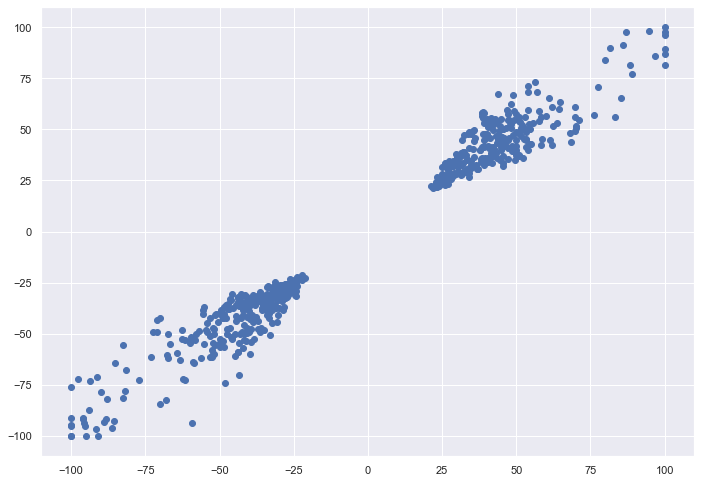

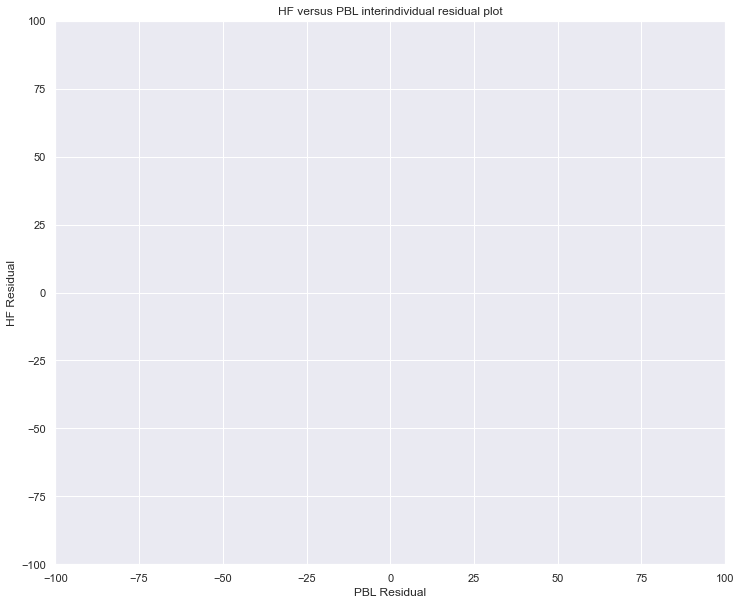

In [147]:
x = High_SIVI_Bins_df['Residual PBL']
y = High_SIVI_Bins_df['Residual HF']

plt.scatter(x, y)
plt.figure(figsize=(12,10))
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.title('HF versus PBL interindividual residual plot')
plt.xlabel('PBL Residual')
plt.ylabel('HF Residual')
plt.show()

[Text(0.5, 1.0, 'CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')]

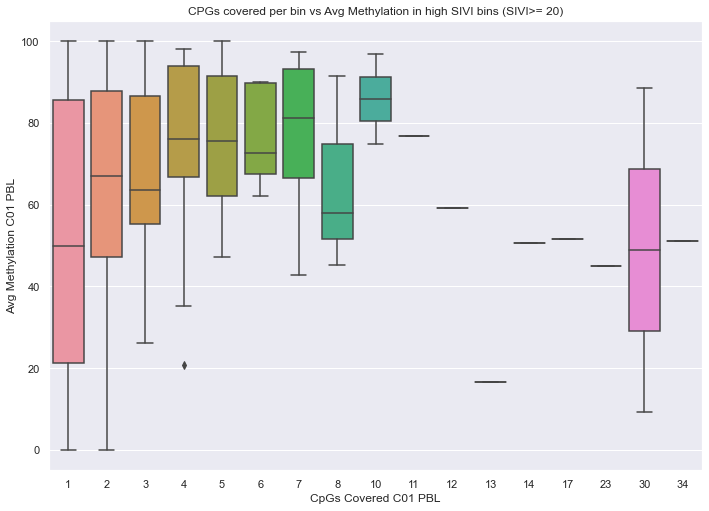

In [148]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='CpGs Covered C01 PBL', y='Avg Methylation C01 PBL', data=High_SIVI_Bins_df).set(title='CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')

[Text(0.5, 1.0, 'CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')]

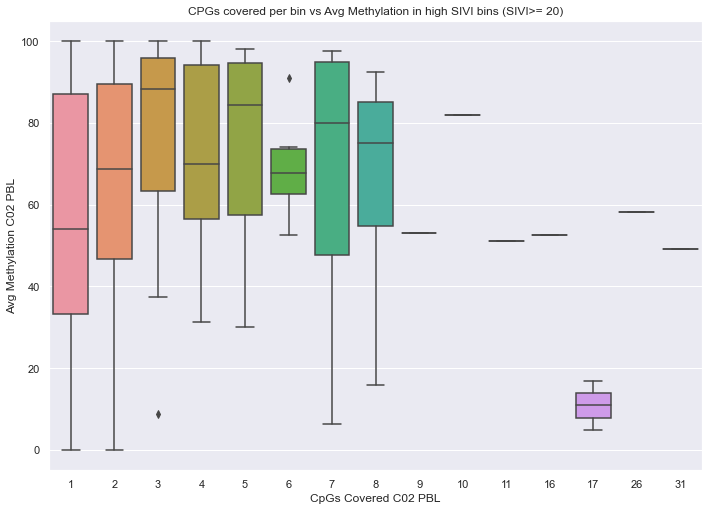

In [149]:
sns.boxplot(x='CpGs Covered C02 PBL', y='Avg Methylation C02 PBL', data=High_SIVI_Bins_df).set(title='CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')

[Text(0.5, 1.0, 'CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')]

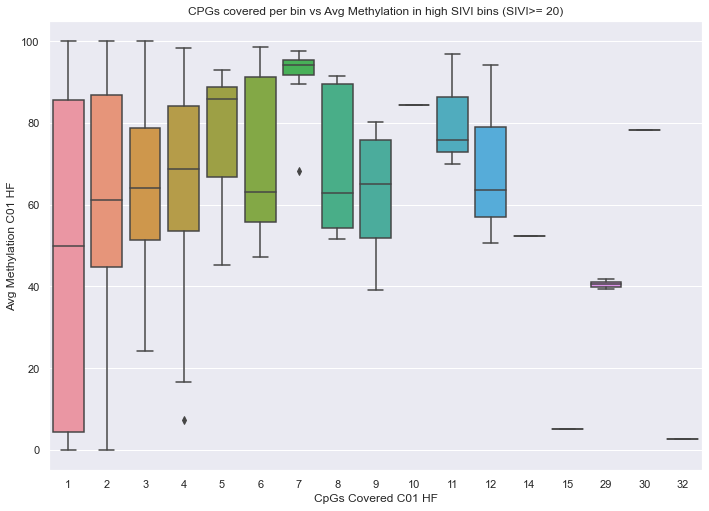

In [150]:
sns.boxplot(x='CpGs Covered C01 HF', y='Avg Methylation C01 HF', data=High_SIVI_Bins_df).set(title='CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')

[Text(0.5, 1.0, 'CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')]

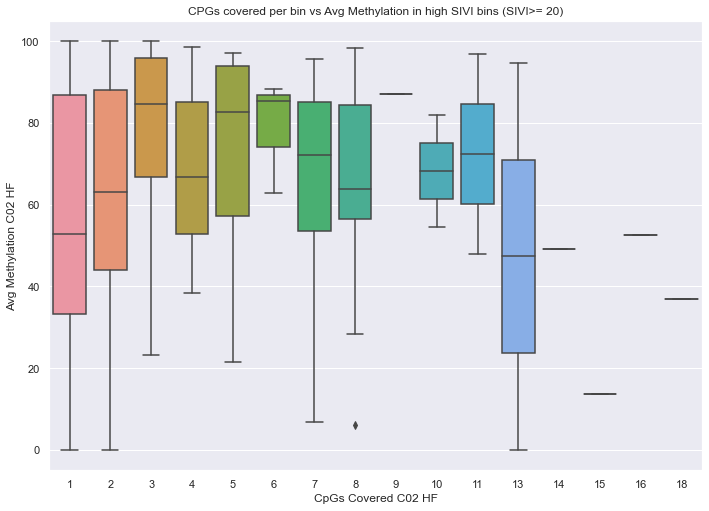

In [151]:
sns.boxplot(x='CpGs Covered C02 HF', y='Avg Methylation C02 HF', data=High_SIVI_Bins_df).set(title='CPGs covered per bin vs Avg Methylation in high SIVI bins (SIVI>= 20)')

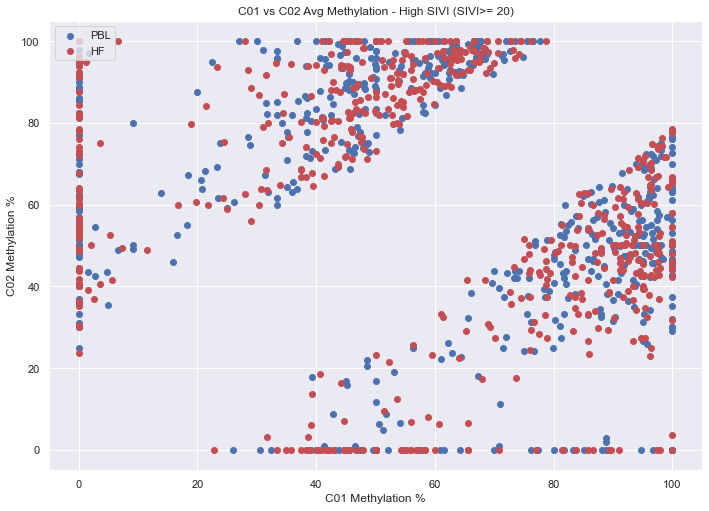

In [152]:
plt.scatter(High_SIVI_Bins_df['Avg Methylation C01 PBL'],High_SIVI_Bins_df['Avg Methylation C02 PBL'], c='b', label='PBL')
plt.scatter(High_SIVI_Bins_df['Avg Methylation C01 HF'], High_SIVI_Bins_df['Avg Methylation C02 HF'], c='r', label='HF')
plt.legend(loc='upper left')
plt.title('C01 vs C02 Avg Methylation - High SIVI (SIVI>= 20)')
plt.xlabel('C01 Methylation %')
plt.ylabel('C02 Methylation %')
plt.show()

UCSC Browser Coordinates_x    208693
Bin Name                      208693
Avg Methylation_x             208693
CpGs Covered_x                208693
Num of CpGs with RD_n         208693
Unnamed: 0                    208693
UCSC Browser Coordinates_y    208693
Avg Methylation_y             208693
CpGs Covered_y                208693
dtype: int64


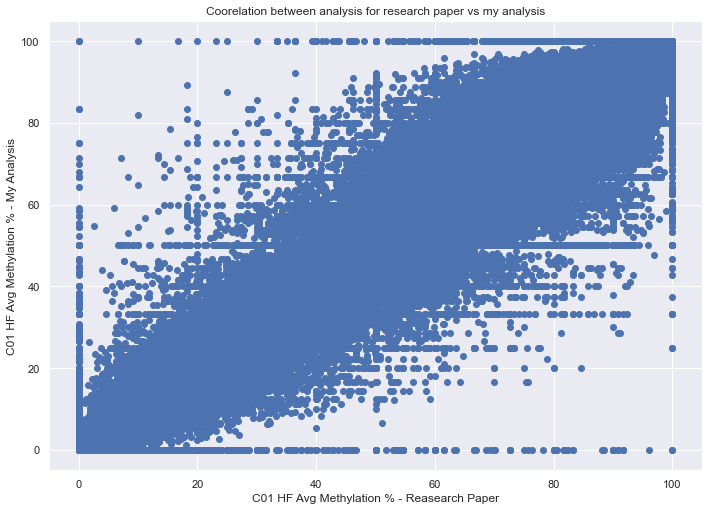

In [153]:
chr19_from_paper_df = from_paper_df[from_paper_df['Bin Name'].str.contains("chr19")]

correlation_of_results = pd.merge(df_filtered_C01_HF, chr19_from_paper_df, on="Bin Name")

print(correlation_of_results.count())

plt.scatter(correlation_of_results['Avg Methylation_x'],correlation_of_results['Avg Methylation_y'], c='b')
plt.title('Coorelation between analysis for research paper vs my analysis')
plt.xlabel('C01 HF Avg Methylation % - Reasearch Paper')
plt.ylabel('C01 HF Avg Methylation % - My Analysis')
plt.show()

/Users/udithamaduranga/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<module 'matplotlib.pyplot' from '/Users/udithamaduranga/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

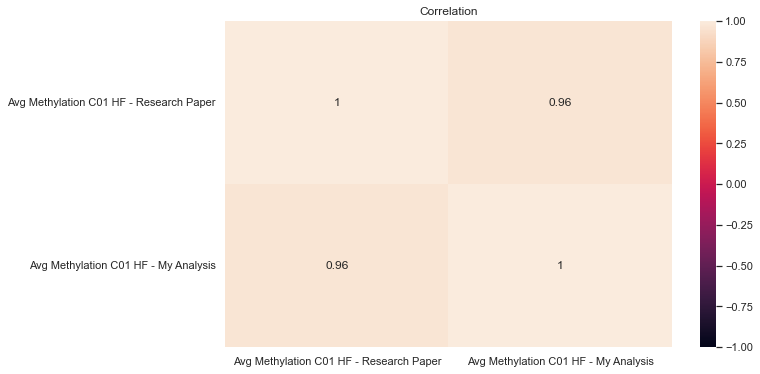

In [154]:
def display_correlation(df):
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Correlation")
    return(plt)

correlation_df = correlation_of_results[['Avg Methylation_x','Avg Methylation_y']]
correlation_df.rename(columns = {'Avg Methylation_x':'Avg Methylation C01 HF - Research Paper', 'Avg Methylation_y':'Avg Methylation C01 HF - My Analysis'}, inplace = True)
display_correlation(correlation_df)